# SELECCIÓN DE VARIABLES EN MODELOS LINEALES
__Club de Ciencia de datos__

__Por:__ _Ayar Yuman Paco Sanizo_

La Paz, Bolivia 18 de Abril de 2018

______________________________________

A continuación se describen algunos métodos para seleccionar variables en modelos lineales. Sin embargo primero se inicia con un tratamiento de los datos de entrada.

# 1. Preparación de datos

In [66]:
# Primero... instalar paquetes faltantes
# install.packages("gridExtra")
# install.packages("GGally")
# install.packages("glmnet")

# Si ubiece algún problema probar esto antes:
# options(repos = "https://cran.rstudio.com")
# Fuente: https://stackoverflow.com/questions/45115975/problems-with-installation-r-packages

package 'glmnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\AYAR\AppData\Local\Temp\Rtmpcfrmke\downloaded_packages


In [2]:
# Leer librerias
library(ggplot2)
library(grid)
library(gridExtra)
library(GGally)
library(glmnet)

Warning message:
"package 'GGally' was built under R version 3.4.4"Warning message:
"package 'glmnet' was built under R version 3.4.4"Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



## 1.1 Exploración de los datos

Exploraremos una base de datos de variables selecionadas y pre-procesadas del Banco Mundial (http://databank.bancomundial.org/data/home.aspx). La base de datos muestra distintos promedios simples de indicadores económicos entre los años 2000 - 2006 para distintos países.

In [3]:
# Leer datos
datos_paises <- readRDS("C:/Users/AYAR/Google Drive/Club de Ciencia de Datos/Bases de Datos/Banco Mundial/datos_paises_variables_de_interes_personal_APS_prepro_f.rds")
head(datos_paises)

,gni_pc,ext_bal,agr_va,ser_va,ind_va,edu_exp,rsdv_exp,researchers,h_tech_exp,bs_st_cost,nw_bs_dnst,employ,unemploy,in_class
BOL,4989.15,2.35,13.88,51.81,34.31,6.66,0.25,125.48,11.10,105.39,0.43,68.76,4.24,Lower middle income
ALB,8589.28,-22.20,22.09,53.14,24.77,3.24,0.12,157.34,1.50,28.51,0.91,47.40,14.99,Upper middle income
DZA,11963.54,11.20,9.57,36.29,54.14,4.34,0.20,168.12,0.97,12.52,0.46,36.27,15.34,Upper middle income
ARG,16360.11,4.04,8.00,61.18,30.82,4.40,0.47,945.54,7.82,12.86,0.53,54.17,10.42,Upper middle income
AUS,38714.44,-1.16,2.89,69.99,27.11,4.98,2.07,4060.73,13.15,1.08,10.77,61.11,5.51,High income
AUT,42216.06,3.03,1.55,68.64,29.81,5.47,2.46,4018.92,13.48,4.29,0.62,56.80,5.08,High income


In [4]:
summary(datos_paises)

     gni_pc         ext_bal            agr_va           ser_va     
 Min.   : 1141   Min.   :-36.980   Min.   : 0.050   Min.   :36.02  
 1st Qu.: 7890   1st Qu.: -7.190   1st Qu.: 2.550   1st Qu.:54.92  
 Median :16360   Median : -1.560   Median : 5.130   Median :62.60  
 Mean   :20923   Mean   : -1.977   Mean   : 9.423   Mean   :61.91  
 3rd Qu.:33081   3rd Qu.:  3.240   3rd Qu.:12.565   3rd Qu.:69.10  
 Max.   :63370   Max.   : 28.340   Max.   :44.740   Max.   :91.42  
     ind_va         edu_exp         rsdv_exp      researchers     
 Min.   : 8.51   Min.   :1.670   Min.   :0.050   Min.   :  17.58  
 1st Qu.:24.10   1st Qu.:3.630   1st Qu.:0.300   1st Qu.: 166.01  
 Median :28.14   Median :4.400   Median :0.610   Median : 945.54  
 Mean   :28.68   Mean   :4.614   Mean   :0.946   Mean   :1760.32  
 3rd Qu.:32.66   3rd Qu.:5.435   3rd Qu.:1.285   3rd Qu.:3037.36  
 Max.   :62.71   Max.   :9.720   Max.   :3.400   Max.   :7454.10  
   h_tech_exp      bs_st_cost        nw_bs_dnst        

## 1.2 Disperción de las variables respecto a la respuesta

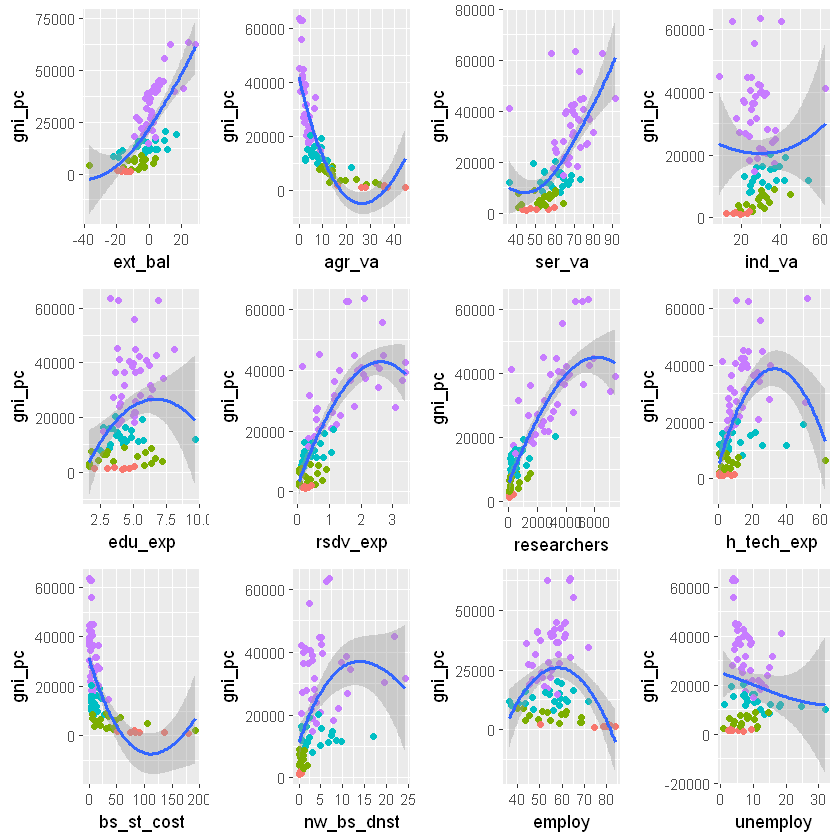

In [5]:
disp_plot_1 <- list()
for(i in c(1:12)){
  disp_plot_1[[i]] <- ggplot(datos_paises, aes_string(x=colnames(datos_paises)[i+1],y="gni_pc")) +
    geom_point(aes(colour=in_class),show.legend = F)+geom_smooth(span=2, method = 'loess')
}
grid.arrange(grobs=disp_plot_1, ncol=4)

# 1.3 Transformación de variables

In [6]:
datos_paises_t             <- datos_paises
datos_paises_t$gni_pc      <- log(datos_paises_t$gni_pc)
datos_paises_t$ext_bal     <- log(datos_paises_t$ext_bal+100)
datos_paises_t$agr_va      <- log(datos_paises_t$agr_va)
datos_paises_t$ser_va      <- log(datos_paises_t$ser_va)
datos_paises_t$ind_va      <- log(datos_paises_t$ind_va)
datos_paises_t$edu_exp     <- log(datos_paises_t$edu_exp)
datos_paises_t$rsdv_exp    <- log(datos_paises_t$rsdv_exp)
datos_paises_t$researchers <- log(datos_paises_t$researchers)
datos_paises_t$h_tech_exp  <- log(datos_paises_t$h_tech_exp)
datos_paises_t$bs_st_cost  <- log(datos_paises_t$bs_st_cost)
datos_paises_t$nw_bs_dnst  <- log(datos_paises_t$nw_bs_dnst)
datos_paises_t$employ      <- log(datos_paises_t$employ)
datos_paises_t$unemploy    <- log(datos_paises_t$unemploy)
colnames(datos_paises_t)   <- c("l_gni_pc",
                                "l_ext_bal",
                                "l_agr_va",
                                "l_ser_va",
                                "l_ind_va",
                                "l_edu_exp",
                                "l_rsdv_exp",
                                "l_researchers",
                                "l_h_tech_exp",
                                "l_bs_st_cost",
                                "l_nw_bs_dnst",
                                "l_employ",
                                "l_unemploy",
                                "in_class")

Ahora... ¡Volvamos a ver los gráficos de disperción!

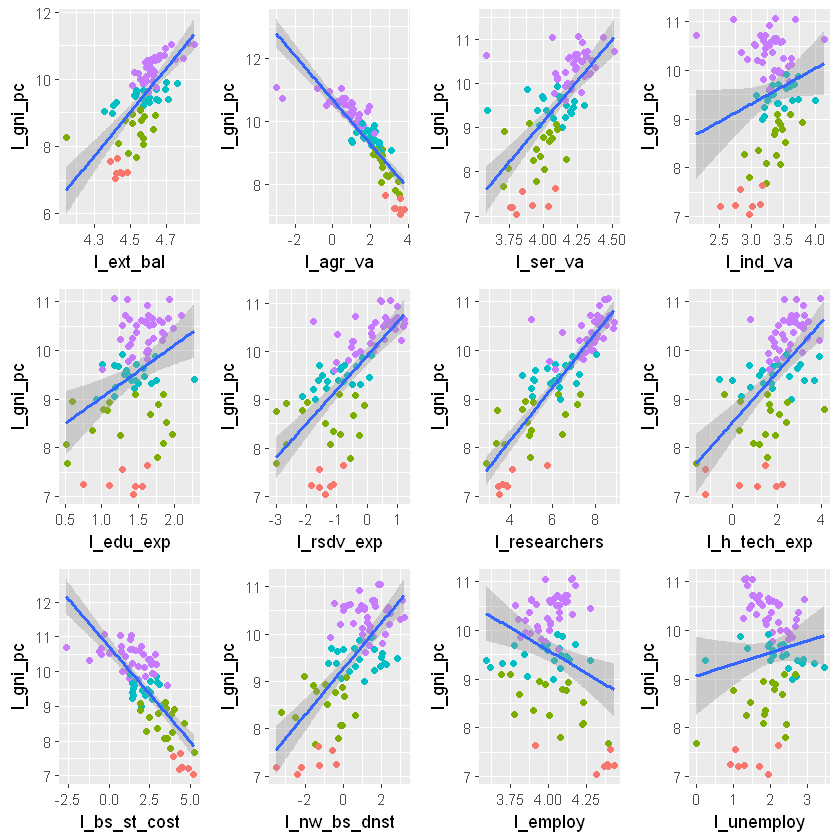

In [7]:
disp_plot_2 <- list()
for(i in c(1:12)){
  disp_plot_2[[i]] <- ggplot(datos_paises_t, aes_string(x=colnames(datos_paises_t)[i+1],y="l_gni_pc")) +
    geom_point(aes(colour=in_class),show.legend = F) +geom_smooth(method="lm")
}
grid.arrange(grobs=disp_plot_2, ncol=4)

# 2. Modelación

In [8]:
mod_lin <- lm(data=datos_paises_t,
              l_gni_pc~l_ext_bal+l_agr_va+l_ser_va+l_ind_va+l_edu_exp+l_rsdv_exp+l_researchers+l_h_tech_exp+l_bs_st_cost+l_nw_bs_dnst+l_employ+l_unemploy+in_class
              )

In [9]:
summary(mod_lin)


Call:
lm(formula = l_gni_pc ~ l_ext_bal + l_agr_va + l_ser_va + l_ind_va + 
    l_edu_exp + l_rsdv_exp + l_researchers + l_h_tech_exp + l_bs_st_cost + 
    l_nw_bs_dnst + l_employ + l_unemploy + in_class, data = datos_paises_t)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39738 -0.13412 -0.01859  0.17544  0.37317 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  0.63957    2.66760   0.240 0.811251    
l_ext_bal                    1.26525    0.39716   3.186 0.002193 ** 
l_agr_va                    -0.15630    0.04209  -3.713 0.000419 ***
l_ser_va                     0.42480    0.31161   1.363 0.177368    
l_ind_va                     0.18053    0.13894   1.299 0.198269    
l_edu_exp                    0.13506    0.09399   1.437 0.155394    
l_rsdv_exp                  -0.11923    0.05979  -1.994 0.050211 .  
l_researchers                0.16750    0.04806   3.485 0.000873 ***
l_h_tech_exp                -0.

In [10]:
round(confint(mod_lin, level=0.90),4)

,5 %,95 %
(Intercept),-3.8098,5.0889
l_ext_bal,0.6028,1.9277
l_agr_va,-0.2265,-0.0861
l_ser_va,-0.0949,0.9445
l_ind_va,-0.0512,0.4123
l_edu_exp,-0.0217,0.2918
l_rsdv_exp,-0.2190,-0.0195
l_researchers,0.0873,0.2477
l_h_tech_exp,-0.0602,0.0352
l_bs_st_cost,-0.1033,-0.0009


# 3. Identificación de variables importantes

## 3.1 Métodos Iterativos

Los siguientes métodos parten por un modelo base y en cada iteración se incorporan o quitan variables tomando algún criterio de selección.

__Criterio de Información de Akaike__

Un criterio muy usado es el Criterio de Información de Akaike (AIC). Para un modelo de regresión lineal el AIC esta definido como:

$$
AIC = 2k + n\ln \Big(\frac{SCE}{n}\Big)
$$

donde,

* $k$: Número de parámetros.

* $n$: Número de observaciones

* $SCE$: Cuadrado medio de los errores.

Calculemos el AIC para nuestro modelo:

In [11]:
AIC <- 2*16 + nrow(datos_paises_t)*log(sum(mod_lin.todo$residuals^2)/nrow(datos_paises_t))
round(AIC,2)

ERROR: Error in eval(expr, envir, enclos): objeto 'mod_lin.todo' no encontrado


### 3.1.1 Selección Backward

In [12]:
mod_lin.todo <- lm(data=datos_paises_t, l_gni_pc~.)


In [13]:
step(mod_lin.todo, direction="backward")

Start:  AIC=-243.19
l_gni_pc ~ l_ext_bal + l_agr_va + l_ser_va + l_ind_va + l_edu_exp + 
    l_rsdv_exp + l_researchers + l_h_tech_exp + l_bs_st_cost + 
    l_nw_bs_dnst + l_employ + l_unemploy + in_class

                Df Sum of Sq    RSS     AIC
- l_h_tech_exp   1    0.0085 3.0228 -244.95
- l_nw_bs_dnst   1    0.0569 3.0712 -243.63
- l_employ       1    0.0645 3.0787 -243.43
<none>                       3.0143 -243.19
- l_ind_va       1    0.0760 3.0902 -243.12
- l_ser_va       1    0.0836 3.0979 -242.91
- l_edu_exp      1    0.0929 3.1072 -242.67
- l_bs_st_cost   1    0.1296 3.1439 -241.69
- l_unemploy     1    0.1708 3.1851 -240.61
- l_rsdv_exp     1    0.1789 3.1932 -240.40
- l_ext_bal      1    0.4566 3.4708 -233.48
- l_researchers  1    0.5464 3.5606 -231.36
- l_agr_va       1    0.6202 3.6345 -229.65
- in_class       3    4.1631 7.1774 -177.18

Step:  AIC=-244.95
l_gni_pc ~ l_ext_bal + l_agr_va + l_ser_va + l_ind_va + l_edu_exp + 
    l_rsdv_exp + l_researchers + l_bs_st_cost


Call:
lm(formula = l_gni_pc ~ l_ext_bal + l_agr_va + l_rsdv_exp + l_researchers + 
    l_bs_st_cost + l_employ + l_unemploy + in_class, data = datos_paises_t)

Coefficients:
                (Intercept)                    l_ext_bal  
                    2.88644                      1.33305  
                   l_agr_va                   l_rsdv_exp  
                   -0.15068                     -0.07604  
              l_researchers                 l_bs_st_cost  
                    0.17183                     -0.04779  
                   l_employ                   l_unemploy  
                   -0.32702                     -0.10158  
in_classLower middle income  in_classUpper middle income  
                    0.70293                      1.29059  
        in_classHigh income  
                    1.67193  


### 3.1.2 Selección Forward

In [14]:
mod_lin.base <- lm(data=datos_paises_t, l_gni_pc~1)

In [15]:
summary(mod_lin.base)


Call:
lm(formula = l_gni_pc ~ 1, data = datos_paises_t)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4973 -0.5641  0.1655  0.8687  1.5196 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.5371     0.1152   82.78   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.05 on 82 degrees of freedom


In [16]:
step(mod_lin.base, direction = "forward", scope = formula(mod_lin.todo))

Start:  AIC=9.03
l_gni_pc ~ 1

                Df Sum of Sq    RSS      AIC
+ in_class       3    80.705  9.635 -170.734
+ l_researchers  1    66.751 23.589 -100.419
+ l_agr_va       1    65.767 24.573  -97.026
+ l_bs_st_cost   1    54.125 36.216  -64.836
+ l_rsdv_exp     1    43.440 46.900  -43.378
+ l_nw_bs_dnst   1    41.821 48.519  -40.561
+ l_ext_bal      1    41.566 48.775  -40.125
+ l_ser_va       1    39.085 51.255  -36.008
+ l_h_tech_exp   1    30.458 59.883  -23.095
+ l_edu_exp      1    10.979 79.361    0.279
+ l_employ       1     9.415 80.925    1.899
+ l_ind_va       1     3.974 86.367    7.300
<none>                       90.340    9.034
+ l_unemploy     1     1.676 88.664    9.479

Step:  AIC=-170.73
l_gni_pc ~ in_class

                Df Sum of Sq    RSS     AIC
+ l_agr_va       1    3.7547 5.8805 -209.72
+ l_researchers  1    2.6739 6.9612 -195.71
+ l_ext_bal      1    2.4657 7.1695 -193.27
+ l_bs_st_cost   1    1.6762 7.9590 -184.60
+ l_rsdv_exp     1    1.5781 8.05


Call:
lm(formula = l_gni_pc ~ in_class + l_agr_va + l_researchers + 
    l_ext_bal + l_rsdv_exp, data = datos_paises_t)

Coefficients:
                (Intercept)  in_classLower middle income  
                    1.21131                      0.77133  
in_classUpper middle income          in_classHigh income  
                    1.34717                      1.70051  
                   l_agr_va                l_researchers  
                   -0.17086                      0.20285  
                  l_ext_bal                   l_rsdv_exp  
                    1.29901                     -0.07179  


### 3.1.3 Alernativa 3: Selección Stepwise

In [17]:
step(mod_lin.base,direction = "both",scope = formula(mod_lin.todo))

Start:  AIC=9.03
l_gni_pc ~ 1

                Df Sum of Sq    RSS      AIC
+ in_class       3    80.705  9.635 -170.734
+ l_researchers  1    66.751 23.589 -100.419
+ l_agr_va       1    65.767 24.573  -97.026
+ l_bs_st_cost   1    54.125 36.216  -64.836
+ l_rsdv_exp     1    43.440 46.900  -43.378
+ l_nw_bs_dnst   1    41.821 48.519  -40.561
+ l_ext_bal      1    41.566 48.775  -40.125
+ l_ser_va       1    39.085 51.255  -36.008
+ l_h_tech_exp   1    30.458 59.883  -23.095
+ l_edu_exp      1    10.979 79.361    0.279
+ l_employ       1     9.415 80.925    1.899
+ l_ind_va       1     3.974 86.367    7.300
<none>                       90.340    9.034
+ l_unemploy     1     1.676 88.664    9.479

Step:  AIC=-170.73
l_gni_pc ~ in_class

                Df Sum of Sq    RSS      AIC
+ l_agr_va       1     3.755  5.880 -209.718
+ l_researchers  1     2.674  6.961 -195.714
+ l_ext_bal      1     2.466  7.169 -193.268
+ l_bs_st_cost   1     1.676  7.959 -184.597
+ l_rsdv_exp     1     1.578


Call:
lm(formula = l_gni_pc ~ in_class + l_agr_va + l_researchers + 
    l_ext_bal + l_rsdv_exp, data = datos_paises_t)

Coefficients:
                (Intercept)  in_classLower middle income  
                    1.21131                      0.77133  
in_classUpper middle income          in_classHigh income  
                    1.34717                      1.70051  
                   l_agr_va                l_researchers  
                   -0.17086                      0.20285  
                  l_ext_bal                   l_rsdv_exp  
                    1.29901                     -0.07179  


__Otro Ejemplo...__

Notemos que en el anterior ejemplo obtuvimos el mismo resultado que al usar la selección forward. Esto no necesariamente ocurrira siempre. Planteemos otro ejemplo:

In [18]:
N <- 2000
y <- rnorm(N)
x1 <- y + rnorm(N)
x2 <- y + rnorm(N)
x3 <- y + rnorm(N)
x4 <- rnorm(N)
x5 <- rnorm(N)
x6 <- x1 + x2 + x3 + rnorm(N)
data <- data.frame(y, x1, x2, x3, x4, x5, x6)

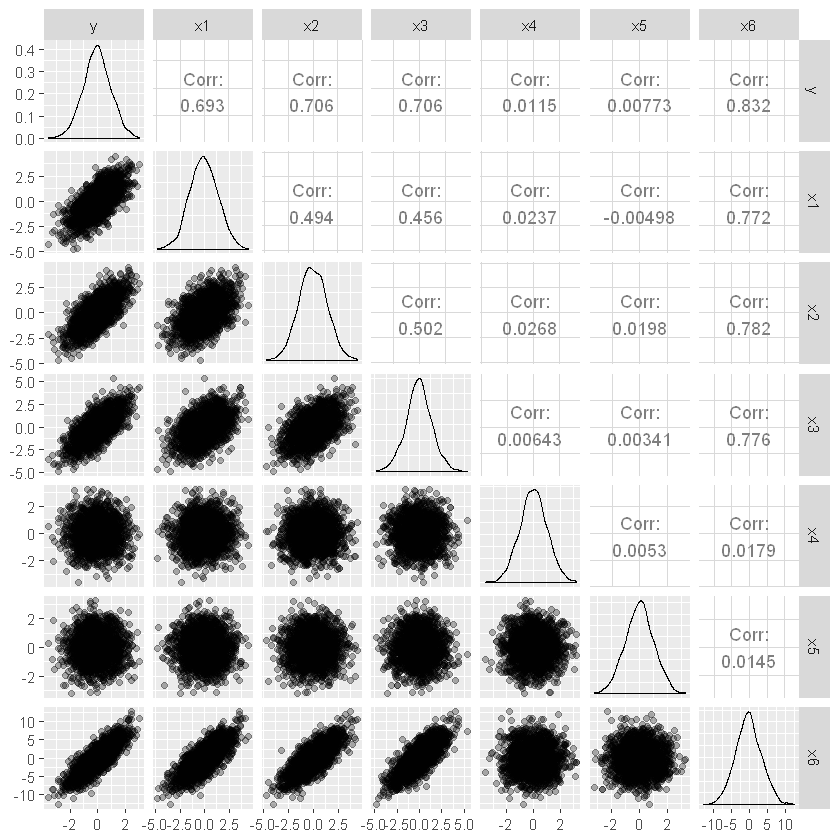

In [19]:
ggpairs(data, lower = list(continuous = wrap("points", alpha = 0.3)))

In [20]:
mod_lin.base2 <- lm(data=data, y~1)
summary(mod_lin.base2)


Call:
lm(formula = y ~ 1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5290 -0.6451 -0.0020  0.6622  3.0914 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.04604    0.02220  -2.074   0.0382 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9927 on 1999 degrees of freedom


In [21]:
mod_lin.todo2 <- lm(data=data, y~.)
summary(mod_lin.todo2)


Call:
lm(formula = y ~ ., data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.71298 -0.34173  0.00167  0.33250  1.58410 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.005473   0.011111   0.493    0.622    
x1           0.243901   0.014449  16.880   <2e-16 ***
x2           0.241608   0.014503  16.659   <2e-16 ***
x3           0.256227   0.014462  17.717   <2e-16 ***
x4          -0.008215   0.010877  -0.755    0.450    
x5           0.001349   0.011024   0.122    0.903    
x6           0.002145   0.010972   0.195    0.845    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4958 on 1993 degrees of freedom
Multiple R-squared:  0.7513,	Adjusted R-squared:  0.7505 
F-statistic:  1003 on 6 and 1993 DF,  p-value: < 2.2e-16


In [22]:
step(mod_lin.base2, direction = "both", scope = formula(mod_lin.todo2))

Start:  AIC=-28.29
y ~ 1

       Df Sum of Sq     RSS      AIC
+ x6    1   1364.40  605.53 -2385.58
+ x3    1    983.10  986.83 -1408.80
+ x2    1    981.30  988.64 -1405.15
+ x1    1    946.67 1023.27 -1336.29
<none>              1969.94   -28.29
+ x4    1      0.26 1969.68   -26.56
+ x5    1      0.12 1969.82   -26.41

Step:  AIC=-2385.58
y ~ x6

       Df Sum of Sq     RSS      AIC
+ x3    1     18.08  587.46 -2444.20
+ x2    1     15.17  590.37 -2434.32
+ x1    1     12.43  593.11 -2425.06
<none>               605.53 -2385.58
+ x5    1      0.04  605.50 -2383.71
+ x4    1      0.02  605.51 -2383.66
- x6    1   1364.40 1969.94   -28.29

Step:  AIC=-2444.2
y ~ x6 + x3

       Df Sum of Sq    RSS     AIC
+ x1    1     29.25 558.21 -2544.3
+ x2    1     27.38 560.08 -2537.6
<none>              587.46 -2444.2
+ x5    1      0.02 587.44 -2442.3
+ x4    1      0.01 587.45 -2442.2
- x3    1     18.08 605.53 -2385.6
- x6    1    399.38 986.83 -1408.8

Step:  AIC=-2544.32
y ~ x6 + x3 + x1

 


Call:
lm(formula = y ~ x3 + x1 + x2, data = data)

Coefficients:
(Intercept)           x3           x1           x2  
   0.005404     0.258468     0.245937     0.243590  


## 3.2 Métodos de contracción

A partir de estos métodos obtenemos estimadores de los parámetros penalizándolos tratando de contraerlos a cero. En ambos casos esto implica resolver un problema de minimzación sujeto a alguna restricción.

### 3.2.1 Regresión de Ridge

En la regresión Ridge, resolvemos el siguiente problema:

$$
\min\limits_{\beta} \sum_{i=1}^{n}\Big(y_i - \beta_0 - \sum_{j=1}^{p}\beta_j x_{ij}\Big)^2 sujeto \ a \sum_{j=1}^{p}\beta^2_j 	\leq s
$$


Es decir, obtenemos los estimadores de los parámetros minimizando la siguiente función:

$$
\sum_{i=1}^{n}\Big(y_i - \beta_0 - \sum_{j=1}^{p}\beta_j x_{ij}\Big)^2 + \lambda \sum_{j=1}^{p}\beta^2_j = SCE + + \lambda \sum_{j=1}^{p}\beta^2_j 
$$

,donde $\lambda$ es el parámetro "tuneador".

__Ejemplo__

Usemos la regresion Ridge en nuestro problema...


In [35]:
# Antes...
Y <- datos_paises_t$l_gni_pc
X <- model.matrix(l_gni_pc~., data = datos_paises_t)[,-1]
head(X)

,l_ext_bal,l_agr_va,l_ser_va,l_ind_va,l_edu_exp,l_rsdv_exp,l_researchers,l_h_tech_exp,l_bs_st_cost,l_nw_bs_dnst,l_employ,l_unemploy,in_classLower middle income,in_classUpper middle income,in_classHigh income
BOL,4.628398,2.6304490,3.947583,3.535437,1.896119,-1.3862944,4.832146,2.40694511,4.65766775,-0.84397007,4.230622,1.444563,1,0,0
ALB,4.354141,3.0951250,3.972930,3.209633,1.175573,-2.1202635,5.058409,0.40546511,3.35025490,-0.09431068,3.858622,2.707383,0,1,0
DZA,4.711330,2.2586332,3.591542,3.991573,1.467874,-1.6094379,5.124678,-0.03045921,2.52732737,-0.77652879,3.590991,2.730464,0,1,0
ARG,4.644775,2.0794415,4.113820,3.428164,1.481605,-0.7550226,6.851756,2.05668455,2.55412172,-0.63487827,3.992127,2.343727,0,1,0
AUS,4.593502,1.0612565,4.248352,3.299903,1.605430,0.7275486,8.309118,2.57642176,0.07696104,2.37676449,4.112676,1.706565,0,0,1
AUT,4.635020,0.4382549,4.228875,3.394844,1.699279,0.9001613,8.298768,2.60120711,1.45628673,-0.47803580,4.039536,1.625311,0,0,1


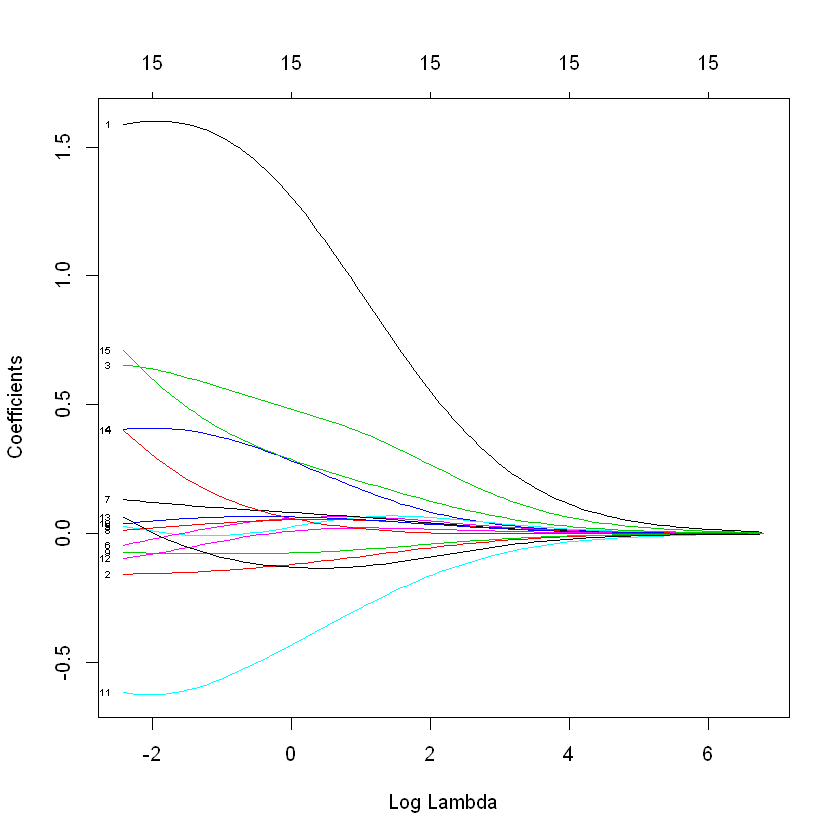

In [25]:
# Ahora si...
reg.ridge = glmnet(x = X,y = Y,alpha=0)
plot(reg.ridge,xvar="lambda",label=TRUE)

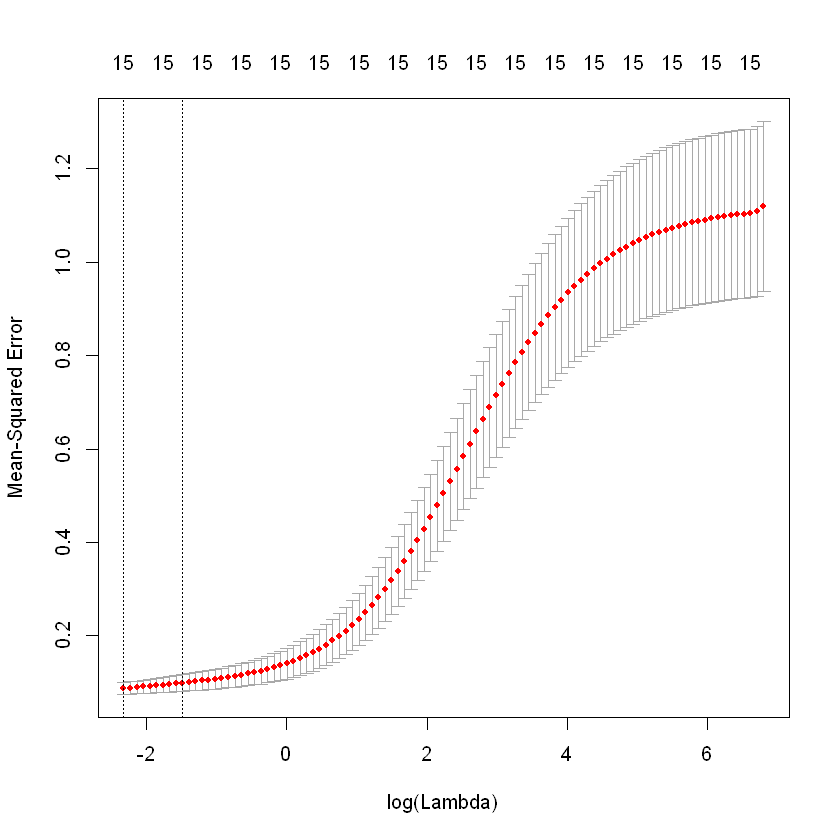

In [26]:
set.seed(12345)
cv.reg.ridge <- cv.glmnet(x=X,y=Y,alpha=0)
plot(cv.reg.ridge)

In [29]:
log(cv.reg.ridge$lambda.1se)
log(cv.reg.ridge$lambda.min)

[1] -1.48118

[1] -2.318484

In [298]:
coef(cv.reg.ridge, s = "lambda.1se", exact = FALSE)

16 x 1 sparse Matrix of class "dgCMatrix"
                                       1
(Intercept)                  0.359122048
l_ext_bal                    1.587232948
l_agr_va                    -0.150323638
l_ser_va                     0.603788939
l_ind_va                     0.398842522
l_edu_exp                   -0.005878097
l_rsdv_exp                   0.005629499
l_researchers                0.108938300
l_h_tech_exp                 0.031753333
l_bs_st_cost                -0.077909779
l_nw_bs_dnst                 0.058526940
l_employ                    -0.606503208
l_unemploy                  -0.053806359
in_classLower middle income -0.054755936
in_classUpper middle income  0.207511499
in_classHigh income          0.486194220

In [299]:
SCE.ridge <- sum((predict(cv.lasso, s = "lambda.1se", newx = X)-Y)^2)
SCE.ridge

[1] 3.819605

In [300]:
AIC.ridge <- 2*16 + nrow(datos_paises_t)*log(SCE.ridge/nrow(datos_paises_t))
round(AIC.ridge,2)

[1] -223.53

### 3.2.2 LASSO

Al usar LASSO (Least Absolute Shrinkage and Selection Operator), resolvemos el siguiente problema:

$$
\min\limits_{\beta} \sum_{i=1}^{n}\Big(y_i - \beta_0 - \sum_{j=1}^{p}\beta_j x_{ij}\Big)^2 sujeto \ a \sum_{j=1}^{p}|{\beta_j}| 	\leq s
$$


Entoces, obtenemos los estimadores de los parámetros minimizando la siguiente función:

$$
\sum_{i=1}^{n}\Big(y_i - \beta_0 - \sum_{j=1}^{p}\beta_j x_{ij}\Big)^2 + \lambda \sum_{j=1}^{p}|{\beta_j}| = SCE + \lambda \sum_{j=1}^{p}|\beta_j|
$$

__Ejemplo__

Usando LASSO en nuestro promebla tenemos...

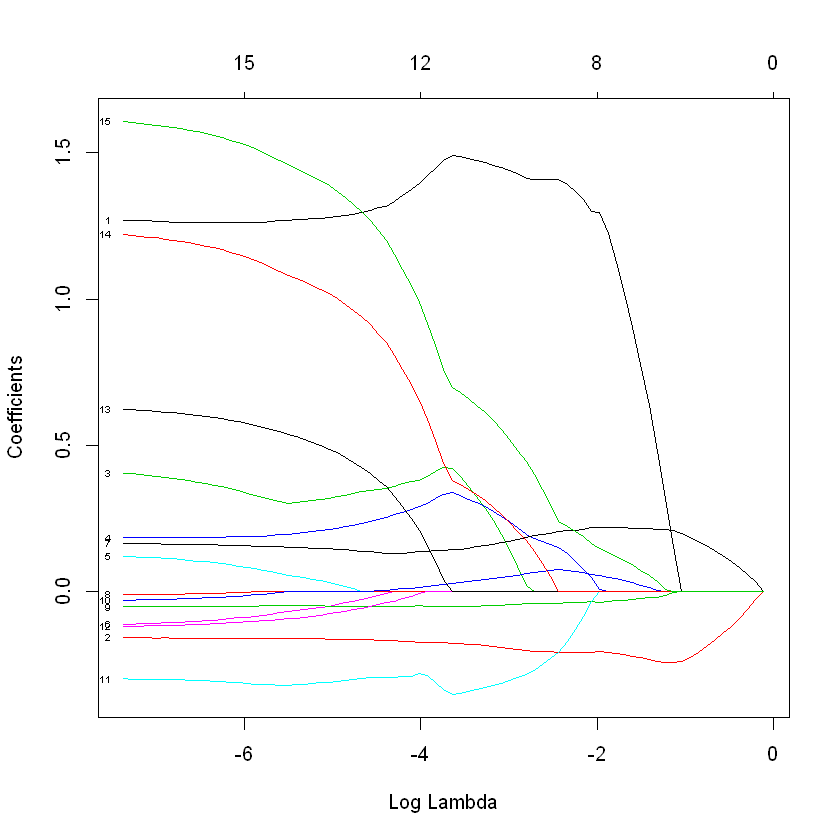

In [30]:
lasso = glmnet(x = X,y = Y,alpha=1)
plot(lasso,xvar="lambda",label=TRUE)

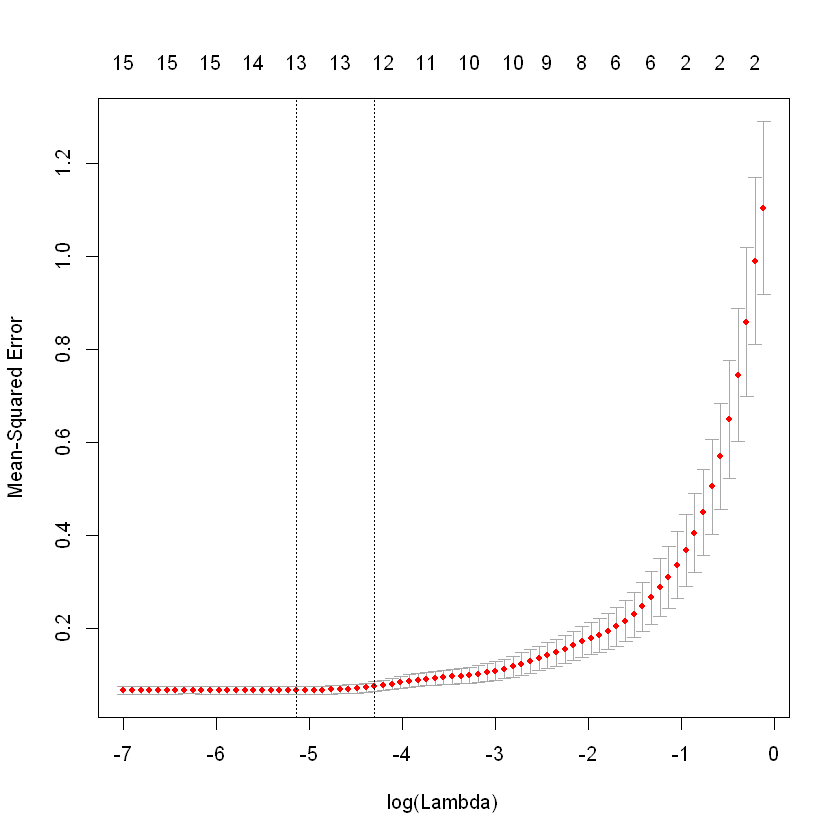

In [302]:
set.seed(12345)
cv.lasso <- cv.glmnet(x=X,y=Y,alpha=1)
plot(cv.lasso)

In [303]:
coef(cv.lasso, s = "lambda.1se", xact = T)

16 x 1 sparse Matrix of class "dgCMatrix"
                                      1
(Intercept)                  1.00892919
l_ext_bal                    1.33549246
l_agr_va                    -0.16725212
l_ser_va                     0.36151676
l_ind_va                     0.26378619
l_edu_exp                    .         
l_rsdv_exp                   .         
l_researchers                0.13101651
l_h_tech_exp                 .         
l_bs_st_cost                -0.04908644
l_nw_bs_dnst                 0.00845123
l_employ                    -0.29282336
l_unemploy                  -0.03119507
in_classLower middle income  0.32658939
in_classUpper middle income  0.80674571
in_classHigh income          1.15337124

In [304]:
SCE.lasso <- sum((predict(cv.lasso, s = "lambda.1se", newx = X)-Y)^2)
SCE.lasso

[1] 3.819605

In [307]:
AIC.lasso <- 2*13 + nrow(datos_paises_t)*log(SCE.lasso/nrow(datos_paises_t))
round(AIC.lasso,2)

[1] -229.53

# 4 Referencias

__Libros y Papers:__
* G. James, D. Witten, T. Hastie, R. Tibshirani (2013). An Introduction to Statistical Learning. 205-227.
* Hastie, Tibshirani, Friedman (2008). The Elements of Statistical Machine Learning. 57 - 73
* Ana González Vidal (2015). Selección de variables: Una revisión de métodos existentes.
* Tibshirani, R. (1996). Regression Shrinkage and Selection via the Lasso. Journal of the Royal Statistical Society. Series B (Methodological), 58(1), 267-288.
* Valeria Fonti (2017). Feature Selection using LASSO. VU Amsterdam.

__Páginas Web:__
* http://statweb.stanford.edu/~tibs/lasso.html
* https://stats.stackexchange.com/questions/17251/what-is-the-lasso-in-regression-analysis
* https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c
* https://stats.stackexchange.com/questions/7935/what-are-disadvantages-of-using-the-lasso-for-variable-selection-for-regression (Ese Peter es un loquillo)
* https://web.stanford.edu/~hastie/glmnet/glmnet_alpha.html


__Videos:__
* https://www.youtube.com/watch?v=OYEII--K_k4 (Backward Elimination) 
* https://www.youtube.com/watch?v=0aTtMJO-pE4 (Forward Selection)   
* https://www.youtube.com/watch?v=ejR8LnQziPY (Stepwise)           
